In [7]:
import os
import warnings
warnings.filterwarnings('ignore')
import scanpy as sc
import squidpy as sq
import numpy as np
import pandas as pd
import seaborn as sns
import anndata as ad
from statannotations.Annotator import Annotator

In [20]:
os.makedirs('../../results/04_spatial/18_compare_niches')

In [2]:
adata = sc.read_h5ad('../../results/04_spatial/15_integrate_with_cell_proportion/integrated.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 13204 × 17
    obs: 'patient_id', 'condition', 'leiden'
    uns: 'condition_colors', 'leiden', 'leiden_colors', 'neighbors', 'patient_id_colors', 'umap'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

In [4]:
# we can compute the cell-type composition between control and SSc
df_prop = pd.crosstab(adata.obs['patient_id'],adata.obs['leiden'], normalize='index').reset_index()
df_obs = adata.obs[['patient_id', 'condition']].drop_duplicates()
df_prop = pd.melt(df_prop, id_vars=['patient_id'], value_name='proportion')
df = df_prop.merge(df_obs)

In [19]:
df

,patient_id,leiden,proportion,condition
0,HC01,0,0.129730,Healthy
1,HC02,0,0.126697,Healthy
2,HC03,0,0.111357,Healthy
3,HC05,0,0.024184,Healthy
4,SSc4994,0,0.182808,SSc
...,...,...,...,...
163,SSc-HL11,11,0.040288,SSc
164,SSc-HL13,11,0.016529,SSc
165,SSc-HL25,11,0.049268,SSc
166,SSc-HL33,11,0.004071,SSc


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

9_Healthy vs. 9_SSc: Mann-Whitney-Wilcoxon test two-sided, P_val:5.395e-02 U_stat=6.000e+00
10_Healthy vs. 10_SSc: Mann-Whitney-Wilcoxon test two-sided, P_val:8.392e-01 U_stat=1.800e+01
11_Healthy vs. 11_SSc: Mann-Whitney-Wilcoxon test two-sided, P_val:4.535e-01 U_stat=2.600e+01
8_Healthy vs. 8_SSc: Mann-Whitney-Wilcoxon test two-sided, P_val:1.878e-01 U_stat=1.000e+01
1_Healthy vs. 1_SSc: Mann-Whitney-Wilcoxon test two-sided, P_val:3.596e-02 U_stat=5.000e+00
0_Healthy vs. 0_SSc: Mann-Whitney-Wilcoxon test two-sided, P_val:3.996e-03 U_stat=1.000e+00
2_Healthy vs. 2_SSc: Mann-Whitney-Wilcoxon test two-sided, P_val:3.596e-02 U_stat=3.500e+01
3_Healthy vs. 3_SSc: Mann-Whitney-Wilcoxon test two-sided, P_val:6.354e-01 U_stat=2.400e+01
4_Healthy vs. 4_SSc: Mann-Whitney-Wilcoxon test two-sided, P_val:2.3

(<Axes: xlabel='leiden', ylabel='proportion'>,
  <statannotations.Annotation.Annotation at 0x7fc08da75b70>])

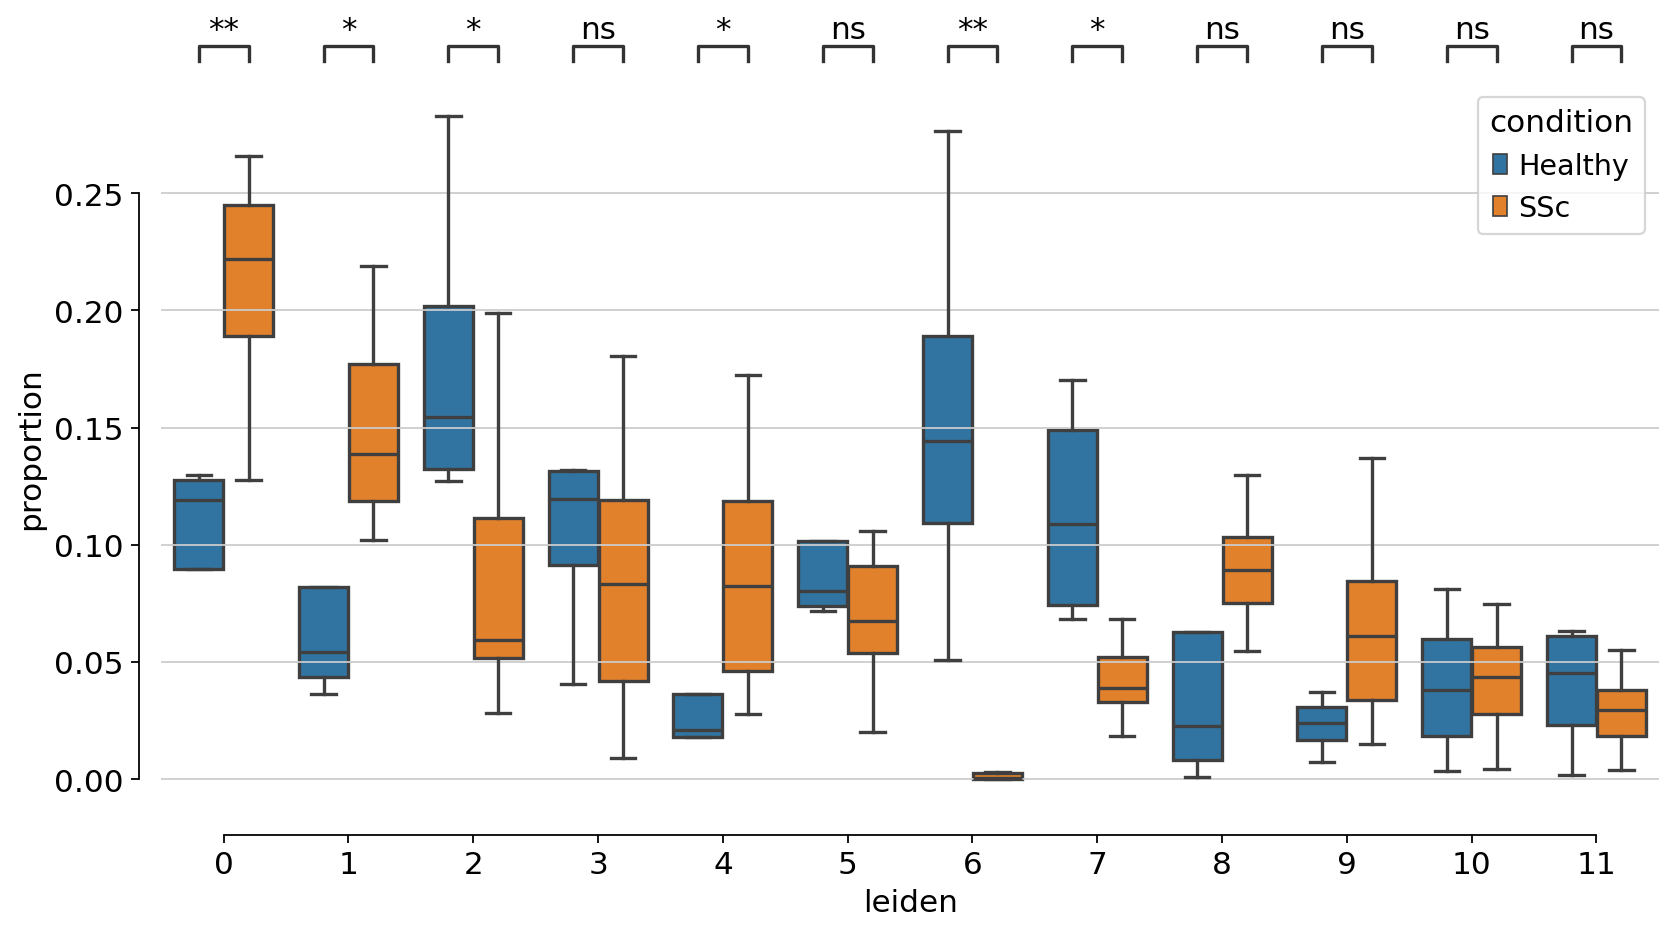

In [18]:
# visualize cell type proportion
sc.set_figure_params(figsize=(12, 6))
ax = sns.boxplot(data=df, 
                 x='leiden', y='proportion', 
                 hue="condition", 
                 showfliers = False)
sns.despine(offset=10, trim=True, ax=ax)

pairs=[(('0', "Healthy"), ('0', "SSc")),
       (('1', "Healthy"), ('1', "SSc")),
       (('2', "Healthy"), ('2', "SSc")),
       (('3', "Healthy"), ('3', "SSc")),
       (('4', "Healthy"), ('4', "SSc")),
       (('5', "Healthy"), ('5', "SSc")),
       (('6', "Healthy"), ('6', "SSc")),
       (('7', "Healthy"), ('7', "SSc")),
       (('8', "Healthy"), ('8', "SSc")),
       (('9', "Healthy"), ('9', "SSc")),
       (('10', "Healthy"), ('10', "SSc")),
       (('11', "Healthy"), ('11', "SSc"))]

annotator = Annotator(ax, pairs, data=df, x='leiden', y='proportion', hue='condition')
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

In [21]:
df.to_csv(f'../../results/04_spatial/18_compare_niches/niches_proportion.csv')